In [118]:
from __future__ import division
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from scipy.io import loadmat
housing = loadmat('./homework3/data/housing.mat')

In [5]:
# Info about the dataset
# https://archive.ics.uci.edu/ml/datasets/Housing
# Gelman on Standardization: 
# http://www.stat.columbia.edu/~gelman/research/published/standardizing7.pdf
# Stats Overflow on standardization:
# http://stats.stackexchange.com/questions/7112/when-and-how-to-use-standardized-explanatory-variables-in-linear-regression

### Problem 2

In [116]:
m = 16
n = 100
X = np.random.rand(n, 1) # create n random datapoints
y = np.random.random(size=n) # create y random labels between [0,1]
Q = [[] for j in range(m)] # initialize m target datasets

In [105]:
# Instance Mapping Procedure
for j in range(m):
    for i, data_point in enumerate(X):
        z = 1 if y[i] >= np.float(j/m) else 0
        Q[j].append((data_point, z))

In [108]:
ys = [[d[1] for d in s] for s in datasets]

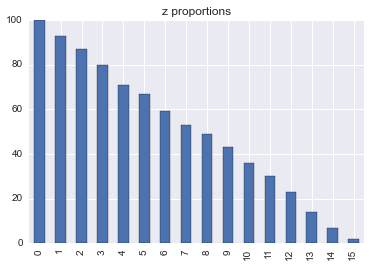

In [136]:
pd.DataFrame(ys).T.sum().plot(kind='bar').set_title('z proportions')

In [131]:
x = [x[0] for x in X]
y1 = list(y)
df = pd.DataFrame({'x': x, 'y': y1})

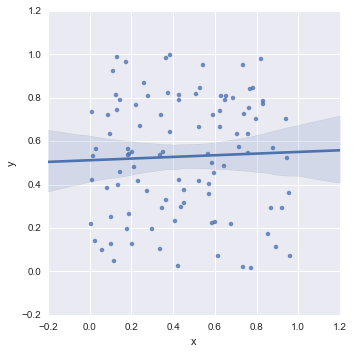

In [132]:
sns.lmplot('x', 'y', df)

### Problem 2(a)
Q) To analyze how this reduction behaves, we will consider the idealized scenario where we actually have “access” to the distribution P, as well as the distributions Q1, Q2, . . . , Qm implicitly constructed by the instance mapping procedure.

A) We can think of regression as conditional means, that is estimate the mean given a particular input value.  What we're doing in this reduction is converting x values into classes and creating class conditional distributions for each class and then binary predictors to estimate whether or not the value is part of the class. P is a sort of limit, where there are an infinite number of classes and would give usthe actual means of these 

### Problem 3

In [11]:
from sklearn import linear_model

In [12]:
X_train = housing['data']
y_train = housing['labels']

X_test = housing['testdata']
y_test = housing['testlabels']

### Problem 3 (a)

In [70]:
# (a) Compute the ordinary least squares (OLS) estimator based on the training data. (You can
# use whatever software you like to do this.) Here, you should consider the model that also
# incorporates the intercept parameter. What is the numerical value of the intercept term?
# How is it related to the training labels? Justify your answer.

ols_clf = linear_model.LinearRegression()
ols_clf.fit(X_train, y_train)
ols_clf.intercept_

# Explanation:
# The intercept is: 22.57470356.  This number is equal to the the mean (22.57470355) of the training outcomes, 
# which makes sense given that the data has been standardized.  In effect, the standardization process has 
# shifted the data so the mean of the output is centered around 0.  Without considering any other factors, 
# you'd expect the value of the house to be the expected value of the dataset.  

array([ 22.57470356])

### Problem 3 (b)

In [88]:
# (b) What is the average squared loss of the OLS estimator (from part (a)) on the training data?
# And on the test data?
train_mse = np.mean((ols_clf.predict(X_train) - y_train) ** 2)
test_mse = np.mean((ols_clf.predict(X_test) - y_test) ** 2)

print """Training MSE: {}\nTesting MSE {}
""".format(train_mse, test_mse)

Training MSE: 22.1037987797
Testing MSE 24.4065641284



### Problem 3 (c)
 - Read this!!: http://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_recovery.html

In [162]:
# (c) Use some existing software package to compute a sparse weight vector with at most three nonzero
# entries (not including the “intercept”). This should be done just using the training data.
# Report what software (e.g., the specific MATLAB/Python function) you used, and the names
# of the variables (as given in https://archive.ics.uci.edu/ml/machine-learning-databases/
# housing/housing.names) that have non-zero weight. Do these make sense to you?
# Some suggested methods to use: Lasso, LARS (which is actually an algorithm for solving the
# Lasso optimization problem with some additional convenient properties), stepwise regression,
# orthogonal matching pursuit.

In [92]:
df_trainC = df_train.ix[:, 1:]

In [120]:
def create_ranom_sparse_df(df, n_cols):
    zeros = np.zeros(df.shape)
    col_ixs = np.random.choice(range(0, len(df.columns)), n_cols)
    for ix in col_ixs:
        zeros[:, ix] = df.ix[:, ix].values
    
    return pd.DataFrame(zeros, columns=df.columns)

In [156]:
X_train = create_ranom_sparse_df(df_trainC, 3)

In [158]:
# Lasso:
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
lasso_clf = linear_model.Lasso(alpha=0.1)
lasso_clf.fit(X_train, y_train)
lasso_clf.intercept_

array([ 22.57470356])

In [159]:
# LARS: 
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lars.html
lars_clf = linear_model.Lars(n_nonzero_coefs=3)
lars_clf.fit(X_train, y_train)
lars_clf.intercept_

array([ 22.57470356])

In [160]:
# Orthogonal Matching Pursuit
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.OrthogonalMatchingPursuit.html
omp_clf = linear_model.OrthogonalMatchingPursuit(n_nonzero_coefs=3)
omp_clf.fit(X_train, y_train)
omp_clf.intercept_

array([ 22.57470356])

In [35]:
def plot_figs(fig_num, elev, azim, X_train, clf):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)

    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='k', marker='+')
    ax.plot_surface(np.array([[-.1, -.1], [.15, .15]]),
                    np.array([[-.1, .15], [-.1, .15]]),
                    clf.predict(np.array([[-.1, -.1, .15, .15],
                                          [-.1, .15, -.1, .15]]).T
                                ).reshape((2, 2)),
                    alpha=.5)
    ax.set_xlabel('X_1')
    ax.set_ylabel('X_2')
    ax.set_zlabel('Y')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

In [61]:
# Attribute Information
# 0. Column of 1s to facilitate intercepts
# 1. CRIM: per capita crime rate by town 
# 2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
# 3. INDUS: proportion of non-retail business acres per town 
# 4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
# 5. NOX: nitric oxides concentration (parts per 10 million) 
# 6. RM: average number of rooms per dwelling 
# 7. AGE: proportion of owner-occupied units built prior to 1940 
# 8. DIS: weighted distances to five Boston employment centres 
# 9. RAD: index of accessibility to radial highways 
# 10. TAX: full-value property-tax rate per $10,000
# 11. PTRATIO: pupil-teacher ratio by town 
# 12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
# 13. LSTAT: % lower status of the population 
# 14. MEDV: Median value of owner-occupied homes in $1000's

cols = ['INT', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df_train = pd.DataFrame(X_train, columns=cols)
ser_train = pd.Series([y[0] for y in y_train])

In [69]:
ser_train.mean()

22.574703557312262